**Bảng phân công công việc:**

Thành viên | MSSV | Bài tập
--- | --- | ---
Đinh Anh Huy | 18110103 | 8.11, 8.23, 8.28
Nguyễn Đức Vũ Duy | 18110004 | 8.22, 8.26, 8.29

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 8.22

### Xét dữ liệu về bò tót ở bảng 1.10. Tận dụng 7 biến YrHgt, FtFrBody, PrctFFB, Frame, BkFat, SaleHi and SaleWt, thực hiện phân tích thành phần chính sử dụng ma trận hiệp phương sai $\boldsymbol{S}$ và ma trận tương quan $\boldsymbol{R}$. Phân tích cần bao gồm:


### (a) Xác định số lượng thành phần chính phù hợp để tóm tắt hiệu quả sự thay đổi ở mẫu. Vẽ scree plot để hỗ trợ xác định của bạn.

In [2]:
path='/content/T1-10.dat.txt'
df=pd.DataFrame(np.loadtxt(path)).iloc[:,2:]
df.columns=['YrHgt','FtFrBody','PrctFFB','Frame','BkFat','SaleHt','SaleWt']
df.head()

YrHgt  FtFrBody  PrctFFB  Frame  BkFat  SaleHt  SaleWt
0   51.0    1128.0     70.9    7.0   0.25    54.8  1720.0
1   51.9    1108.0     72.1    7.0   0.25    55.3  1575.0
2   49.9    1011.0     71.6    6.0   0.15    53.1  1410.0
3   53.1     993.0     68.9    8.0   0.35    56.4  1595.0
4   51.2     996.0     68.6    7.0   0.25    55.0  1488.0

In [3]:
pd.DataFrame(np.loadtxt(path)).iloc[:,0]

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
71    8.0
72    8.0
73    8.0
74    8.0
75    8.0
Name: 0, Length: 76, dtype: float64

In [4]:
S=np.cov(df.T)
S

array([[ 2.99802632e+00,  1.00130526e+02,  2.96001754e+00,
         1.50884211e+00, -5.33921053e-02,  2.98313684e+00,
         8.28107719e+01],
       [ 1.00130526e+02,  8.59434386e+03,  2.09504351e+02,
         5.19501754e+01, -1.39817544e+00,  1.29940070e+02,
         6.68030877e+03],
       [ 2.96001754e+00,  2.09504351e+02,  1.06916561e+01,
         1.45922807e+00, -1.42994737e-01,  3.41422456e+00,
         8.39254035e+01],
       [ 1.50884211e+00,  5.19501754e+01,  1.45922807e+00,
         8.58947368e-01, -2.16140351e-02,  1.48757895e+00,
         4.43207018e+01],
       [-5.33921053e-02, -1.39817544e+00, -1.42994737e-01,
        -2.16140351e-02,  8.02236842e-03, -5.06456140e-02,
         2.41296491e+00],
       [ 2.98313684e+00,  1.29940070e+02,  3.41422456e+00,
         1.48757895e+00, -5.06456140e-02,  4.01796491e+00,
         1.47289614e+02],
       [ 8.28107719e+01,  6.68030877e+03,  8.39254035e+01,
         4.43207018e+01,  2.41296491e+00,  1.47289614e+02,
         1.6850661

In [5]:
R=np.corrcoef(df.T)
R

array([[ 1.        ,  0.62379576,  0.52282226,  0.94024882, -0.34427701,
         0.85951287,  0.36843479],
       [ 0.62379576,  1.        ,  0.69113708,  0.6046407 , -0.16838523,
         0.69925191,  0.55511338],
       [ 0.52282226,  0.69113708,  1.        ,  0.48152341, -0.48825451,
         0.52091459,  0.1977254 ],
       [ 0.94024882,  0.6046407 ,  0.48152341,  1.        , -0.26037619,
         0.80074397,  0.36839597],
       [-0.34427701, -0.16838523, -0.48825451, -0.26037619,  1.        ,
        -0.28208986,  0.20753494],
       [ 0.85951287,  0.69925191,  0.52091459,  0.80074397, -0.28208986,
         1.        ,  0.56605753],
       [ 0.36843479,  0.55511338,  0.1977254 ,  0.36839597,  0.20753494,
         0.56605753,  1.        ]])

In [6]:
def eigen_pairs(model, data):
    eigenvals = model.explained_variance_
    eigenvecs = model.components_

    print(">> Eigenanalysis")
    eigenvals_ = pd.DataFrame(eigenvals.reshape(1,-1))
    eigenvals_.columns = ['PC%s' % i for i in range(1, model.n_components_+1)]
    eigenvals_.index = ['Eigenvalue']
    
    eigenvecs_ = pd.DataFrame(eigenvecs.T)
    eigenvecs_.columns = ['PC%s' % i for i in range(1, model.n_components_+1)]
    eigenvecs_.index = data.columns
    print(eigenvals_)
    print("\n",eigenvecs_)
    return eigenvals_, eigenvecs_

In [7]:
pca = PCA(n_components=7).fit(df)
eigenvals_, eigenvecs_=eigen_pairs(pca, df)

>> Eigenanalysis
                     PC1          PC2      PC3  ...      PC5       PC6       PC7
Eigenvalue  20579.612567  4874.674782  5.42917  ...  0.46883  0.074054  0.004519

[1 rows x 7 columns]

                PC1       PC2       PC3       PC4       PC5       PC6       PC7
YrHgt     0.005887  0.009680  0.286337  0.608787  0.535569  0.509727  0.024592
FtFrBody  0.487047  0.872697 -0.034277 -0.003227  0.000444  0.000457 -0.000253
PrctFFB   0.008526  0.029196  0.904389 -0.425175  0.008388 -0.010389  0.014293
Frame     0.003112  0.004886  0.133267  0.311194  0.390573 -0.855204 -0.037984
BkFat     0.000069 -0.000493 -0.018864 -0.005278  0.011906 -0.043786  0.998778
SaleHt    0.009330  0.008577  0.284215  0.593037 -0.748598 -0.082331  0.013820
SaleWt    0.873259 -0.487193  0.004847 -0.005597  0.002665  0.000341 -0.000256


In [8]:
def PCA_(matrix, n_components=None, correlation=False, column_names=None, return_=False):
    # Eigendecomposition
    eigenvals, eigenvecs = np.linalg.eigh(matrix)

    # Sort paires (eigenvalue, eigenvector) in descending order
    eigenpairs = [(abs(eigenval), eigenvec) for (eigenval, eigenvec) in zip(eigenvals, eigenvecs.T)]
    eigenpairs = sorted(eigenpairs, key = lambda pair: pair[0], reverse = True)

    # Select a subset from the rearranged Eigenvalues vector
    # If n_components is None, select all. Otherwise, select first n_components elements
    if n_components is None:
        eigenpairs_ = eigenpairs
    else:
        eigenpairs_ = eigenpairs[:n_components]

    # Construct weight matrix from above subset
    components_ = [eigenvec for (_, eigenvec) in eigenpairs_]
    explained_variance_ = [eigenval for (eigenval, _) in eigenpairs_]

    # Calculate percentage of cariance explained by each of the selected components
    explained_variance_ratio_ = []
    if correlation:
        for i in range(len(explained_variance_)):
            explained_variance_ratio_.append(explained_variance_[i]/len(explained_variance_))
    else:
        for i in range(len(explained_variance_)):
            explained_variance_ratio_.append(explained_variance_[i]/np.sum(eigenvals))
    explained_variance_ratio_ = np.array(explained_variance_ratio_)
        
    if correlation:
        print(">> Eigenanalysis of the Correlation Matrix")
    else:
        print(">> Eigenanalysis of the Covariance Matrix")
    
    eigenanalys = np.concatenate([np.array(explained_variance_).reshape(-1,1), explained_variance_ratio_.reshape(-1,1), np.cumsum(explained_variance_ratio_).reshape(-1,1)], axis=1)  
    eigenanalys = pd.DataFrame(eigenanalys.T)
    eigenanalys.columns = ['PC%s' % i for i in range(1, len(explained_variance_)+1)]
    eigenanalys.index = ['Eigenvalue', 'Proportion', 'Cumulative']
    
    eigenvecs_ = pd.DataFrame(np.array(components_).T)
    eigenvecs_.columns = ['PC%s' % i for i in range(1, len(explained_variance_)+1)]
    if column_names is not None:
        eigenvecs_.index = column_names
    print(eigenanalys)
    print("\n",eigenvecs_)
    
    if return_:
        return explained_variance_, components_, explained_variance_ratio_

In [9]:
eigenvals, eigenvecs, proportions = PCA_(S, correlation=False, column_names=df.columns, return_=True)

>> Eigenanalysis of the Covariance Matrix
                     PC1          PC2  ...       PC6           PC7
Eigenvalue  20579.612567  4874.674782  ...  0.074054  4.519442e-03
Proportion      0.808198     0.191437  ...  0.000003  1.774865e-07
Cumulative      0.808198     0.999635  ...  1.000000  1.000000e+00

[3 rows x 7 columns]

                PC1       PC2       PC3       PC4       PC5       PC6       PC7
YrHgt    -0.005887  0.009680  0.286337 -0.608787  0.535569 -0.509727  0.024592
FtFrBody -0.487047  0.872697 -0.034277  0.003227  0.000444 -0.000457 -0.000253
PrctFFB  -0.008526  0.029196  0.904389  0.425175  0.008388  0.010389  0.014293
Frame    -0.003112  0.004886  0.133267 -0.311194  0.390573  0.855204 -0.037984
BkFat    -0.000069 -0.000493 -0.018864  0.005278  0.011906  0.043786  0.998778
SaleHt   -0.009330  0.008577  0.284215 -0.593037 -0.748598  0.082331  0.013820
SaleWt   -0.873259 -0.487193  0.004847  0.005597  0.002665 -0.000341 -0.000256


2 thành phần mẫu chính đầu tiên là:
\begin{equation*}
\hat{y_1}=-0.0059x_1-0.487x_2-0.009x_3-0.0031x_4-0.000069x_5-0.0093x_6-0.8733x_7
\end{equation*}
\begin{equation*}
\hat{y_2}=0.00968x_1+0.873x_2+0.029196x_3+0.00489x_4-0.0005x_5+0.0086x_6-0.4872x_7
\end{equation*}

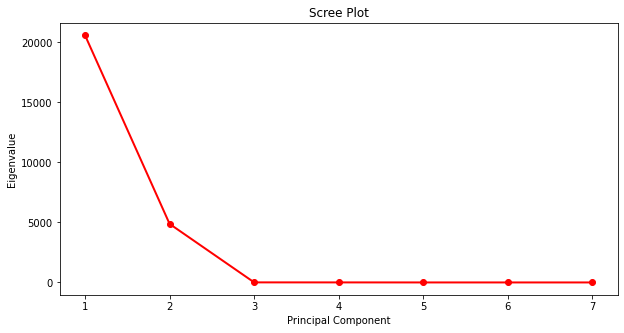

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

PC_values = np.arange(len(eigenvals)) + 1
ax.plot(PC_values, eigenvals, 'ro-', linewidth=2)
ax.set_title('Scree Plot')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Eigenvalue')

plt.show()

Theo scree plot ở trên thì số lượng thành phần phù hợp để thực hiện PCA sẽ là 2. 

### (b) Tính thành phần chính của mẫu.

In [11]:
from matplotlib.patches import Ellipse, Rectangle
def get_cov_ellipse(cov, centre, nstd, eig = False, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    if eig:
        return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs), eigvals, eigvecs
    else: 
        return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)

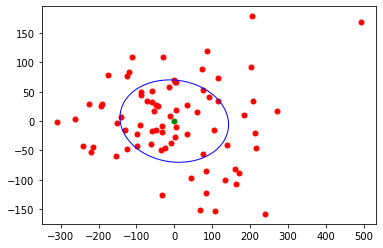

In [12]:
pca = PCA(n_components=2).fit(df)
X_pca=pca.transform(df)
X_mean_1,X_mean_2=X_pca[:,0].mean(), X_pca[:,1].mean()
fig, ax = plt.subplots()
e = Ellipse(xy=(X_mean_1,X_mean_2),width=2*np.sqrt(eigenvals[0]),height=2*np.sqrt(eigenvals[1]),angle=np.arctan2(eigenvecs[0][0],eigenvecs[0][1]), edgecolor='blue', facecolor='None')
ax.scatter(x=X_pca[:,0],y=X_pca[:,1], c='red', s=25)
ax.scatter(X_mean_1,X_mean_2, c='green',s=25)
ax.add_patch(e)

### (d) Sử dụng những giá trị cho 2 thành phần chính đầu tiên, plot dữ liệu lên không gian 2 chiều với $\hat{y_1}$ là trục dọc và $\hat{y_2}$ trục ngang. Bạn có thể phân biệt những nhóm thể hiện 3 giống cattle ? có điểm ngoại lai không ?

In [13]:
breed= pd.DataFrame(np.loadtxt(path)).iloc[:,0].values
df_new=pd.DataFrame(np.concatenate((X_pca,breed.reshape(-1,1)),axis=1))
df_new

0          1    2
0   208.162160  35.010376  1.0
1    71.818871  88.247424  1.0
2  -119.552090  83.924983  1.0
3    33.266808 -21.924086  1.0
4   -58.740680  32.779629  1.0
..         ...        ...  ...
71  -87.900476  50.360746  8.0
72  -72.524615  34.792064  8.0
73 -190.539824  28.527404  8.0
74    4.714649  -9.429444  8.0
75  -86.865713  43.968764  8.0

[76 rows x 3 columns]

Text(0, 0.5, '$\\hat{y_1}$')

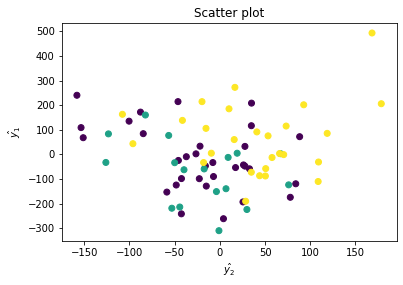

In [14]:
fig, ax = plt.subplots()
ax.scatter(df_new.iloc[:,1],df_new.iloc[:,0],c=df_new.iloc[:,2])
ax.set_title('Scatter plot')
ax.set_xlabel('$\hat{y_2}$')
ax.set_ylabel('$\hat{y_1}$')

Ta có thể thấy là các nhóm cho 3 chủng loại không tách biệt nhau ra nên chúng ta phân biệt các nhóm này. Ngoài ra chúng ta cũng nhận ra có 2 điểm outlier ở góc trên bên phải.

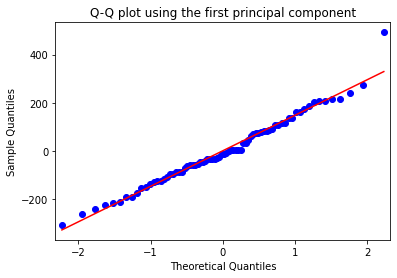

In [15]:
import pylab
import statsmodels.api as sm
sm.qqplot(df_new.iloc[:,0],line='r')
plt.title('Q-Q plot using the first principal component')
plt.show()

Từ Q-Q plot, ta thấy dữ liệu sử dụng thành phần chính đầu tiên có tính chuẩn và có 1 điểm outlier ở góc trên bên phải. 

### 8.26

### Sử dụg dữ liệu về profile tâm lý học ở bảng 4.6. Sử dụng 5 biến Indep, Supp, Benev, Conform và Leader, thực hiện phân tích thành phần chính sử dụng ma trận hiệp phương sai $\boldsymbol{S}$ và ma trận tương quan $\boldsymbol{R}$. Phân tích cần bao gồm

### (a) Xác định số lượng thành phần chính phù hợp để tóm tắt hiệu quả sự thay đổi ở mẫu. Vẽ scree plot để hỗ trợ xác định của bạn.



In [16]:
path='/content/T4-6.DAT.txt'
df=pd.DataFrame(np.loadtxt(path)).iloc[:,:-2]
df.columns=['Indep','Supp','Benev','Conform','Leader']
df.head()

Indep  Supp  Benev  Conform  Leader
0   27.0  13.0   14.0     20.0    11.0
1   12.0  13.0   24.0     25.0     6.0
2   14.0  20.0   15.0     16.0     7.0
3   18.0  20.0   17.0     12.0     6.0
4    9.0  22.0   22.0     21.0     6.0

In [17]:
S=np.cov(df.T)
S

array([[ 34.75020871,  -4.27668456, -18.07179487, -15.97286822,
          5.71645796],
       [ -4.27668456,  17.51341682,   0.41979726,  -7.86821705,
         -8.72331544],
       [-18.07179487,   0.41979726,  29.84472272,   9.34883721,
        -13.94215862],
       [-15.97286822,  -7.86821705,   9.34883721,  33.04263566,
         -9.94186047],
       [  5.71645796,  -8.72331544, -13.94215862,  -9.94186047,
         26.95796064]])

In [18]:
R=np.corrcoef(df.T)
R

array([[ 1.        , -0.17335767, -0.56116271, -0.47137534,  0.186769  ],
       [-0.17335767,  1.        ,  0.01836202, -0.32707967, -0.40146956],
       [-0.56116271,  0.01836202,  1.        ,  0.29770524, -0.49153305],
       [-0.47137534, -0.32707967,  0.29770524,  1.        , -0.33310934],
       [ 0.186769  , -0.40146956, -0.49153305, -0.33310934,  1.        ]])

In [19]:
eigenvals, eigenvecs, proportions = PCA_(S, correlation=False, column_names=df.columns, return_=True)

>> Eigenanalysis of the Covariance Matrix
                  PC1        PC2        PC3        PC4       PC5
Eigenvalue  68.752385  31.508994  23.100973  16.354182  2.392411
Proportion   0.483801   0.221724   0.162558   0.115082  0.016835
Cumulative   0.483801   0.705525   0.868083   0.983165  1.000000

               PC1       PC2       PC3       PC4       PC5
Indep   -0.579435  0.079180  0.642879 -0.309393  0.385963
Supp     0.041657  0.611928 -0.139914  0.514622  0.582578
Benev    0.524285  0.218835 -0.119255 -0.734038  0.352425
Conform  0.493092 -0.572157  0.422187  0.304274  0.398337
Leader  -0.380137 -0.493986 -0.612100 -0.089702  0.478289


2 thành phần mẫu chính đầu tiên là:
\begin{equation*}
\hat{y_1}=-0.579x_1+0.0417x_2+0.524x_3+0.493x_4-0.38x_5
\end{equation*}
\begin{equation*}
\hat{y_2}=0.079x_1+0.612x_2+0.219x_3-0.572x_4-0.494x_5
\end{equation*}

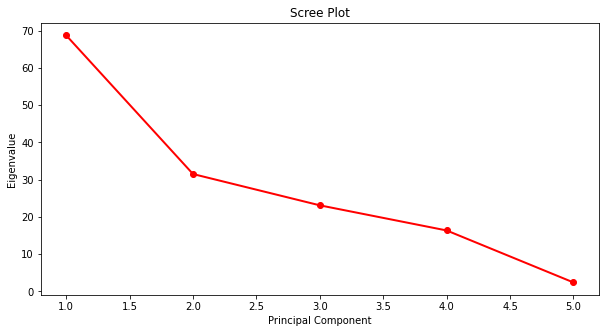

In [20]:
fig, ax = plt.subplots(figsize=(10,5))

PC_values = np.arange(len(eigenvals)) + 1
ax.plot(PC_values, eigenvals, 'ro-', linewidth=2)
ax.set_title('Scree Plot')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Eigenvalue')

plt.show()

Theo scree plot ở trên thì số lượng thành phần phù hợp để thực hiện PCA sẽ là 3, chiếm $86\%$ variance tổng. 

### (b) Tính thành phần chính của mẫu.

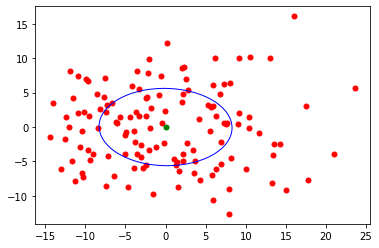

In [21]:
pca = PCA(n_components=3).fit(df)
X_pca=pca.transform(df)
X_mean_1,X_mean_2=X_pca[:,0].mean(), X_pca[:,1].mean()
fig, ax = plt.subplots()
e = Ellipse(xy=(X_mean_1,X_mean_2),width=2*np.sqrt(eigenvals[0]),height=2*np.sqrt(eigenvals[1]),angle=np.arctan2(eigenvecs[0][0],eigenvecs[0][1]), edgecolor='blue', facecolor='None')
ax.scatter(x=X_pca[:,0],y=X_pca[:,1], c='red', s=25)
ax.scatter(X_mean_1,X_mean_2, c='green',s=25)
ax.add_patch(e)

### (c) Sử dụng những giá trị cho 2 thành phần chính đầu tiên, plot dữ liệu lên không gian 2 chiều với $\hat{y_1}$ là trục dọc và $\hat{y_2}$ trục ngang. Bạn có thể phân biệt những nhóm thể hiện 2 mức socioeconomic  hoặc 2 giới tính? có điểm ngoại lai không ?

In [22]:
gender_socio= pd.DataFrame(np.loadtxt(path)).iloc[:,-2:].values
df_new=pd.DataFrame(np.concatenate((X_pca,gender_socio),axis=1))
df_new

0          1          2    3    4
0     6.747074   4.858372  10.772477  2.0  1.0
1   -11.553456   4.248569   5.108165  2.0  1.0
2    -1.149649  -2.879194   2.076037  2.0  1.0
3     1.711755  -6.416196   3.332395  2.0  1.0
4   -10.645734  -2.872201   0.470059  2.0  1.0
..         ...        ...        ...  ...  ...
125  -8.212294   2.591809  -1.962174  1.0  2.0
126  10.536376  10.241984 -12.262522  1.0  2.0
127  -0.777201   4.589811   2.767396  2.0  2.0
128   7.952780  -8.989886   4.714712  2.0  2.0
129  -9.590832   1.668390   1.010498  2.0  2.0

[130 rows x 5 columns]

Text(0, 0.5, '$\\hat{y_1}$')

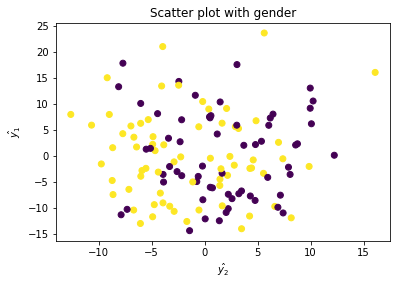

In [23]:
fig, ax = plt.subplots()
ax.scatter(df_new.iloc[:,1],df_new.iloc[:,0],c=df_new.iloc[:,3])
ax.set_title('Scatter plot with gender')
ax.set_xlabel('$\hat{y_2}$')
ax.set_ylabel('$\hat{y_1}$')

Theo scatterplot trên thì ta không thể phân biệt được 2 nhóm theo giới tính. Cũng từ 2 scatterplot ta thấy có 1 điểm ngoại lai.

Text(0, 0.5, '$\\hat{y_1}$')

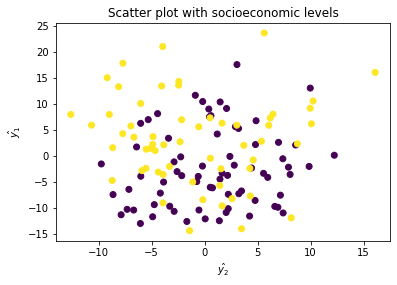

In [24]:
fig, ax = plt.subplots()
ax.scatter(df_new.iloc[:,1],df_new.iloc[:,0],c=df_new.iloc[:,4])
ax.set_title('Scatter plot with socioeconomic levels')
ax.set_xlabel('$\hat{y_2}$')
ax.set_ylabel('$\hat{y_1}$')

Tương tự như scatterplot trên thì ta cũng không phân biệt được 2 nhóm thể hiện 2 socioeconomic levels.

### (d) Xây dựng khoảng tin cậy $95\%$ cho $\lambda_1$, variance của thành phần chính đầu tiên của tổng thể từ ma trận hiệp phương sai. 

In [25]:
alpha=0.05
n=df.shape[0]
import scipy.stats
z=scipy.stats.norm.ppf(1-alpha/2)
lowerbound=eigenvals[0]/(1+z*np.sqrt(2/n))
upperbound=eigenvals[0]/(1-z*np.sqrt(2/n))
print('95% confidence interval for $\lambda_1$ is: [{}, {}]'.format(lowerbound,upperbound))

95% confidence interval for $\lambda_1$ is: [55.30704281337344, 90.83460546511367]


### 8.29

### Theo bài 5.28, sử dụng ma trận hiệp phương sai $\boldsymbol{S}$ cho 30 cases đầu tiên của dữ liệu dây chuyền thân xe hơi, đạt được thành phần chính mẫu.

### (a) Xây dựng $95\%$ ellipse format chart sử dụng 2 thành phần chính đầu tiên $\hat{y_1}$ và $\hat{y_2}$. Xác định vị trí xe mà ngoài tầm kiểm soát

In [26]:
path='/content/T5-14.dat.txt'
df=pd.DataFrame(np.loadtxt(path)).iloc[:30,:]
df.head()

0     1     2     3     4     5
0 -0.12  0.36  0.40  0.25  1.37 -0.13
1 -0.60 -0.35  0.04 -0.28 -0.25 -0.15
2 -0.13  0.05  0.84  0.61  1.45  0.25
3 -0.46 -0.37  0.30  0.00 -0.12 -0.25
4 -0.46 -0.24  0.37  0.13  0.78 -0.15

In [27]:
S=np.cov(df.T)
S

array([[ 0.06260333,  0.06158517,  0.04738345,  0.00828218,  0.01973862,
         0.00313966],
       [ 0.06158517,  0.09244931,  0.02677172, -0.0008431 ,  0.02276483,
         0.01549138],
       [ 0.04738345,  0.02677172,  0.14461655,  0.00784483,  0.02109931,
        -0.0049069 ],
       [ 0.00828218, -0.0008431 ,  0.00784483,  0.10864885,  0.02207241,
         0.0065569 ],
       [ 0.01973862,  0.02276483,  0.02109931,  0.02207241,  0.34284414,
         0.01458276],
       [ 0.00313966,  0.01549138, -0.0049069 ,  0.0065569 ,  0.01458276,
         0.03660517]])

In [28]:
eigenvals, eigenvecs, proportions = PCA_(S, correlation=False, column_names=df.columns, return_=True)

>> Eigenanalysis of the Covariance Matrix
                 PC1       PC2       PC3       PC4       PC5       PC6
Eigenvalue  0.354425  0.186390  0.107609  0.097228  0.033281  0.008834
Proportion  0.449911  0.236605  0.136599  0.123423  0.042247  0.011214
Cumulative  0.449911  0.686517  0.823116  0.946539  0.988786  1.000000

         PC1       PC2       PC3       PC4       PC5       PC6
0 -0.119335  0.469137 -0.075228 -0.290603 -0.267229  0.777270
1 -0.129524  0.457613 -0.250791 -0.623742 -0.036607 -0.566148
2 -0.143195  0.716994  0.116124  0.632305  0.174630 -0.147059
3 -0.096435  0.052868  0.955512 -0.256803 -0.061939 -0.071544
4 -0.967733 -0.231181 -0.069973  0.064055 -0.032243 -0.002952
5 -0.051674  0.013481  0.007798 -0.237984  0.944393  0.220394


2 thành phần chính đầu tiên giải thích $68\%$ tổng variance. Số lượng thành phần chính phù hợp để thực hiện phân tích sẽ là 4, giải thích $94.6\%$ tổng variance.

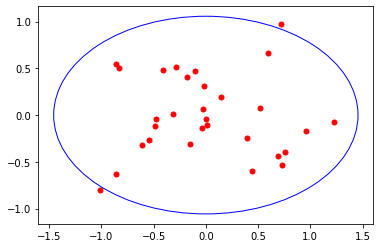

In [29]:
pca = PCA(n_components=4).fit(df)
X_pca=pca.transform(df)
fig, ax = plt.subplots()
centre=(0,0)
#the upper 95% percentile of chi square with degree of freedom of 2 is 5.99
e = Ellipse(centre,width=2*np.sqrt(5.99*eigenvals[0]),height=2*np.sqrt(5.99*eigenvals[1]), edgecolor='blue', facecolor='None')
ax.scatter(x=X_pca[:,0],y=X_pca[:,1], c='red', s=25)
ax.add_patch(e)

Theo $95\%$ ellipse format chart ta có 2 điểm nằm ngoài hình ellipse. 2 điểm này chính là các quan trắc ngoài tầm kiểm soát.

In [30]:
print(np.argmin(X_pca[:,1]))
print(np.argmax(X_pca[:,1]))

2
10


Theo đó, quan trắc thứ 3 và quan trắc thứ 11 nằm ngoài tầm kiểm soát.

### (b) Xây dụng một chart kiểm soát thay thế, dựa trên tổng bình phương $d_{ij}^2$ để kiểm xoát sự thay đổi trong các quan trắc ban đầu được tóm tắt bởi 4 thành phần chính còn lại. Diễn giải chart này.

In [31]:
pca = PCA(n_components=6).fit(df)
X_pca=pca.transform(df)
X_pca.shape

(30, 6)

In [32]:
X_pca=X_pca-X_pca.mean(axis=0)
X_pca[:,2:]=X_pca[:,2:]**2
X=X_pca[:,2:].copy()
d_j=X.sum(axis=1)
d_j.shape

(30,)

In [33]:
d_u=d_j.mean()
s_u=d_j.std(ddof=1)
print(d_u)
print(s_u)

0.23872032851457173
0.19328552011680236


In [34]:
c=s_u/(2*d_u)
v=2*(d_u**2)/s_u
print(c)
print(v)
#Từ đây, ta chọn bậc tự do v = 1

0.4048367420561002
0.5896706096935517


In [35]:
from scipy.stats import chi2
#Tính giới hạn kiểm soát trên
upper_control_limit=c*chi2.ppf(0.95,1)
upper_control_limit

1.5551636737124779

In [36]:
#Tính T^2
X_new=pd.DataFrame(X_pca)
X_new['T^2']=X_new[2]**2/eigenvals[2]+X_new[3]**2/eigenvals[3]+X_new[4]**2/eigenvals[4]+X_new[5]**2/eigenvals[5]
X_new

0         1         2         3         4         5       T^2
0  -0.859820 -0.630622  0.010815  0.035203  0.020683  0.015656  0.054431
1   0.960845 -0.168637  0.013656  0.041692  0.000189  0.000025  0.019612
2  -1.013251 -0.805209  0.330551  0.011902  0.078980  0.001272  1.204456
3   0.761859 -0.394983  0.027385  0.090359  0.008742  0.001186  0.093399
4  -0.153667 -0.304821  0.041221  0.069822  0.000822  0.001550  0.066224
5  -0.474689 -0.038805  0.008712  0.003993  0.014978  0.002126  0.008122
6   0.397112 -0.246467  0.011247  0.014238  0.008877  0.000032  0.005628
7   0.729204 -0.532365  0.007738  0.087014  0.035984  0.011625  0.132632
8   0.000351 -0.042499  0.045147  0.087065  0.012122  0.030658  0.207719
9  -0.540518 -0.268432  0.061688  0.037498  0.014227  0.004603  0.058305
10  0.717281  0.972522  0.050727  0.000214  0.013817  0.000715  0.029707
11  0.688134 -0.434870  0.169008  0.243840  0.063176  0.000160  0.996896
12 -0.038897 -0.136023  0.023637  0.283766  0.079443  0.005951  1.027017
13 -0.607920 -0.316734  0.304311  0.000069  0.002960  0.024091  0.926537
14  0.518295  0.075505  0.651533  0.038785  0.024457  0.003306  3.979490
15  1.230280 -0.074895  0.005317  0.000195  0.013931  0.001031  0.006215
16 -0.834386  0.507738  0.037848  0.058862  0.005763  0.023394  0.111895
17 -0.175838  0.404255  0.003803  0.567386  0.030298  0.000370  3.338770
18  0.595698  0.658788  0.009934  0.108840  0.092380  0.002106  0.379685
19  0.444705 -0.599679  0.352542  0.021148  0.135952  0.048019  1.975953
20  0.149115  0.191286  0.095591  0.185306  0.017353  0.017416  0.481470
21 -0.100085  0.469488  0.242744  0.039056  0.000002  0.026039  0.640027
22 -0.290515  0.517791  0.058843  0.061635  0.000017  0.000283  0.071258
23 -0.029966  0.064173  0.002892  0.002473  0.002126  0.008331  0.008133
24 -0.407780  0.480936  0.119779  0.021103  0.089906  0.000280  0.380788
25 -0.858780  0.547880  0.017534  0.008204  0.081537  0.000001  0.203310
26 -0.316121  0.007119  0.082590  0.323640  0.102932  0.020294  1.505639
27 -0.020893  0.313623  0.073825  0.083116  0.009787  0.000328  0.124589
28  0.015202 -0.104219  0.126795  0.256772  0.002760  0.000191  0.827751
29 -0.484955 -0.111844  0.133235  0.036429  0.000950  0.005147  0.181639

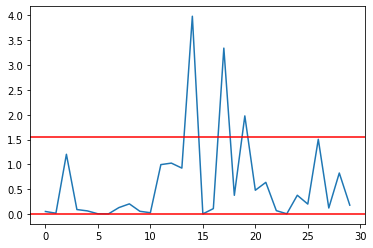

In [37]:
fig, ax = plt.subplots()
ax.plot(X_new['T^2'])
ax.axhline(upper_control_limit,c='red')
ax.axhline(0,c='red')

Từ đây ta thấy có 3 quan trắc ngoài tầm kiểm soát là quan trắc thứ 14, 17, 19.